# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
# !pip install beautifulsoup4

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [155]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Another BA Shambles. Starte...
1,Not Verified | BA cancelled my flight home to...
2,"Not Verified | BA cancelled my flight home, t..."
3,✅ Trip Verified | Turned up 3.5 hours in advan...
4,Not Verified | Boarding – at gate at LGW they...
...,...
995,✅ Trip Verified | London to Muscat first clas...
996,✅ Trip Verified | My family and I travelled f...
997,✅ Trip Verified | Gatwick to Madeira. The fli...
998,✅ Trip Verified | London to Casablanca. Their ...


In [156]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [150]:
#df["reviews"].str.replace("✅","", regex=True)

#df.replace('\d+', '', regex=True, inplace=True)
df["reviews"].str.replace("✅","")
df["reviews"].str.replace("/d+","")

/var/folders/k5/z96kr84j4y561699j28rw1_c0000gn/T/ipykernel_87080/3416954225.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"].str.replace("/d+","")


0      ✅ Trip Verified |  Another BA Shambles. Starte...
1      Not Verified |  BA cancelled my flight home to...
2      Not Verified |  BA cancelled my flight home, t...
3      ✅ Trip Verified | Turned up . hours in advance...
4      Not Verified |  Boarding – at gate at LGW they...
                             ...                        
995    ✅ Trip Verified |  London to Muscat first clas...
996    ✅ Trip Verified |  My family and I travelled f...
997    ✅ Trip Verified |  Gatwick to Madeira. The fli...
998    ✅ Trip Verified | London to Casablanca. Their ...
999    ✅ Trip Verified | British Airways flight manag...
Name: reviews, Length: 1000, dtype: object

In [145]:
df

,reviews,Not Verified,Trip Verified
0,✅ Trip Verified | Another BA Shambles. Starte...,NaN,Trip Verified
1,Not Verified | BA cancelled my flight home to...,Not Verified,NaN
2,"Not Verified | BA cancelled my flight home, t...",Not Verified,NaN
3,✅ Trip Verified | Turned up . hours in advance...,NaN,Trip Verified
4,Not Verified | Boarding – at gate at LGW they...,Not Verified,NaN
...,...,...,...
995,✅ Trip Verified | London to Muscat first clas...,NaN,Trip Verified
996,✅ Trip Verified | My family and I travelled f...,NaN,Trip Verified
997,✅ Trip Verified | Gatwick to Madeira. The fli...,NaN,Trip Verified
998,✅ Trip Verified | London to Casablanca. Their ...,NaN,Trip Verified


In [158]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [159]:
df

,reviews
0,Another BA Shambles. Started off well with e...
1,BA cancelled my flight home to Heathrow on D...
2,"BA cancelled my flight home, the last flight..."
3,"Turned up 3.5 hours in advance, Terminal 5 at..."
4,Boarding – at gate at LGW they called Group ...
...,...
995,London to Muscat first class. First time try...
996,My family and I travelled from Cape Town to ...
997,Gatwick to Madeira. The flight left on time ...
998,London to Casablanca. Their customer service ...


In [160]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with exc...
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on De...
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight o...
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at London...
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group to ...


In [161]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tanmaymittal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanmaymittal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tanmaymittal/nltk_data...


In [162]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tanmaymittal/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tanmaymittal/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with exc...,"[(Another, None), (BA, n), (Shambles, n), (Sta..."
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on De...,"[(BA, n), (cancelled, v), (flight, n), (home, ..."
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight o...,"[(BA, n), (cancelled, v), (flight, n), (home, ..."
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at London...,"[(Turned, v), (hours, n), (advance, a), (Termi..."
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group to ...,"[(Boarding, v), (gate, n), (LGW, n), (called, ..."


In [163]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with exc...,"[(Another, None), (BA, n), (Shambles, n), (Sta...",Another BA Shambles Started well excellent c...
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on De...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home Heathrow Dec th face s...
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight o...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home last flight day Heathr...
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at London...,"[(Turned, v), (hours, n), (advance, a), (Termi...",Turned hour advance Terminal London Heathrow...
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group to ...,"[(Boarding, v), (gate, n), (LGW, n), (called, ...",Boarding gate LGW call Group board World Tra...


In [164]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started well excellent c...
1,BA cancelled my flight home to Heathrow on D...,BA cancel flight home Heathrow Dec th face s...
2,"BA cancelled my flight home, the last flight...",BA cancel flight home last flight day Heathr...
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned hour advance Terminal London Heathrow...
4,Boarding – at gate at LGW they called Group ...,Boarding gate LGW call Group board World Tra...
...,...,...
995,London to Muscat first class. First time try...,London Muscat first class First time try fir...
996,My family and I travelled from Cape Town to ...,family travel Cape Town London th March year...
997,Gatwick to Madeira. The flight left on time ...,Gatwick Madeira flight leave time arrive ear...
998,London to Casablanca. Their customer service ...,London Casablanca customer service quality H...


In [165]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [166]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with exc...,"[(Another, None), (BA, n), (Shambles, n), (Sta...",Another BA Shambles Started well excellent c...,0.9747,Positive
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on De...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home Heathrow Dec th face s...,-0.9062,Negative
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight o...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home last flight day Heathr...,-0.5070,Negative
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at London...,"[(Turned, v), (hours, n), (advance, a), (Termi...",Turned hour advance Terminal London Heathrow...,-0.6369,Negative
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group to ...,"[(Boarding, v), (gate, n), (LGW, n), (called, ...",Boarding gate LGW call Group board World Tra...,0.9678,Positive


In [170]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    535
Negative    353
Neutral     112
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd18dc43610>,
 [Text(-0.12070783228352741, 1.0933570410553966, 'Positive'),
  Text(-0.26350519925775684, -1.067972382584929, 'Negative'),
  Text(1.2672907463411172, -0.46526784139694655, 'Neutral')],
 [Text(-0.06584063579101494, 0.5963765678483981, '53.5%'),
  Text(-0.14373010868604918, -0.5825303905008703, '35.3%'),
  Text(0.7979238032518144, -0.2929464186573367, '11.2%')])

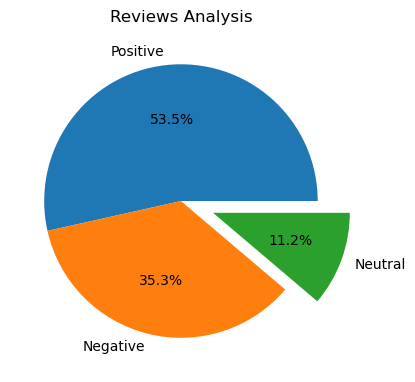

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)